In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sql-murder-mystery-database/sql-murder-mystery.db


from IPython.display import image
image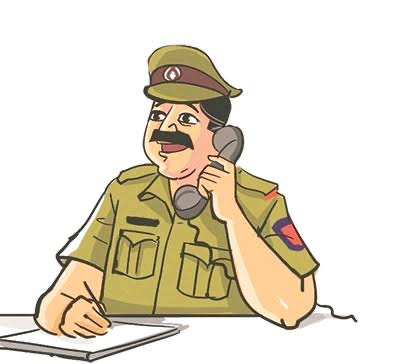

In [2]:
#importing libraries
import pandas as pd
import sqlite3 as sql

# Let's see the structure of database

# Setting up a connection to the database
con = sql.connect('../input/sql-murder-mystery-database/sql-murder-mystery.db')

# Query to retrieve the names of all tables in the database
query_tables = '''
SELECT name 
FROM sqlite_master 
WHERE type='table';
'''

# Executing the query to get all table names
table_names = pd.read_sql_query(query_tables, con)

# Looping through each table to get its columns
for table in table_names['name']:
    print(f"Table: {table}")
    
    # Query to get the structure of the table 
    query_columns = f'PRAGMA table_info({table});'
    
    # Executing the query and displaying the structure
    table_info = pd.read_sql_query(query_columns, con)
    print(table_info[['name', 'type']])
    print("\n" + "="*50 + "\n")

Table: crime_scene_report
          name     type
0         date  INTEGER
1         type     TEXT
2  description     TEXT
3         city     TEXT


Table: drivers_license
           name     type
0            id  INTEGER
1           age  INTEGER
2        height  INTEGER
3     eye_color     TEXT
4    hair_color     TEXT
5        gender     TEXT
6  plate_number     TEXT
7      car_make     TEXT
8     car_model     TEXT


Table: person
                  name     type
0                   id  INTEGER
1                 name     TEXT
2           license_id  INTEGER
3       address_number  INTEGER
4  address_street_name     TEXT
5                  ssn  INTEGER


Table: facebook_event_checkin
         name     type
0   person_id  INTEGER
1    event_id  INTEGER
2  event_name     TEXT
3        date  INTEGER


Table: interview
         name     type
0   person_id  INTEGER
1  transcript     TEXT


Table: get_fit_now_member
                    name     type
0                     id     TEXT
1       

# INTRODUCTION

 We have a mission to solve the SQL Murder Mystery case!

The database has 9 tables,namely;
1. crime_scene_report
2. drivers_license
3. person
4. facebook_event_checkin
5. interview
6. get_fit_now_member
7. get_fit_now_check_in
8. income
9. solution

Now let us view the layout of the first table which could enable us get leads to solve this case

In [3]:
query_1 = '''
SELECT * FROM crime_scene_report
LIMIT 10;
'''
pd.read_sql_query(query_1, con)

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20180115,murder,Life? Dont talk to me about life.,Albany
2,20180115,murder,"Mama, I killed a man, put a gun against his he...",Reno
3,20180215,murder,REDACTED REDACTED REDACTED,SQL City
4,20180215,murder,Someone killed the guard! He took an arrow to ...,SQL City
5,20180115,theft,Big Bully stole my lunch money!,Chicago
6,20180115,fraud,"Lorem ipsum dolor sit amet, consectetur adipis...",Seattle
7,20170712,theft,"A lone hunter stalks the night, firing arrows ...",SQL City
8,20170820,arson,"Wield the Hammer of Sol with honor, Titan, it ...",SQL City
9,20171110,robbery,The Gjallarhorn shoulder-mounted rocket system...,SQL City


Since we are interested in SQL City in this case, we will filter out the table to return information about SQL City only.

In [4]:
query_2 = ''' 
SELECT * FROM crime_scene_report 
WHERE city = 'SQL City' 
ORDER BY date;
'''
pd.set_option('display.max_colwidth', None)

pd.read_sql_query(query_2, con)

,date,type,description,city
0,20170712,theft,"A lone hunter stalks the night, firing arrows into the Darkness.\n There is no hiding, no escape. In the distance, the beast\n falters, tethered to the void. The killing blow comes without\n hesitation, without mercy.",SQL City
1,20170820,arson,"Wield the Hammer of Sol with honor, Titan, it is a thing of\n legend, both past and future.",SQL City
2,20171110,robbery,"The Gjallarhorn shoulder-mounted rocket system was forged from\n the armor of Guardians who fell at the Twilight Gap. Gifted\n to the survivors of that terrible battle, the Gjallarhorn\n is seen as a symbol of honor and survival.",SQL City
3,20180103,bribery,"Apparently, Cayde thought it necessary to expose this extremely\n rare vegetable to a Hive summoning ritual.",SQL City
4,20180115,assault,"Hamilton: Lee, do you yield? Burr: You shot him in the side! Yes he yields!",SQL City
5,20180115,assault,Report Not Found,SQL City
6,20180115,murder,"Security footage shows that there were 2 witnesses. The first witness lives at the last house on ""Northwestern Dr"". The second witness, named Annabel, lives somewhere on ""Franklin Ave"".",SQL City
7,20180215,murder,REDACTED REDACTED REDACTED,SQL City
8,20180215,murder,Someone killed the guard! He took an arrow to the knee!,SQL City


From the table, we have been able to gather a lead which shows that there were two witnesses at the murder scene in SQL city, now let us find these witnesses!

In [5]:
query_3 = '''
SELECT * FROM person
WHERE address_street_name = 'Northwestern Dr' 
ORDER BY address_number DESC
LIMIT 1
'''
pd.read_sql_query(query_3, con)

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


The first witnessed has been identified as: Morty Schapiro. 

In [6]:
query_4 = '''
SELECT * FROM person
WHERE name LIKE '%Annabel%' AND address_street_name = 'Franklin Ave' 
'''
pd.read_sql_query(query_4, con)

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


The Second witness is: Annabel Miller 

In [7]:
query_5 = '''
SELECT * FROM interview
WHERE person_id = '14887' OR person_id = '16371';
'''
pd.read_sql_query(query_5, con)

,person_id,transcript
0,14887,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership number on the bag started with ""48Z"". Only gold members have those bags. The man got into a car with a plate that included ""H42W""."
1,16371,"I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th."


From the witness interviews, we got the following information:

1. The killer had a 'Get Fit Now Gym' bag, and the membership number on the bag started with '48Z'
2. We also know the membership status of the suspect or of the owner of the bag he was carrying.
3. The license plate number of his car also had the characters, "H42W"
4. The second witness confirmed the killer is indeed a gym member and checked in at the gym on January 9.

Let us view the layout of the Get Fit Now Member table.

In [8]:
query_6 = '''
SELECT * FROM get_fit_now_member
LIMIT 5;
'''
pd.read_sql_query(query_6, con)

,id,person_id,name,membership_start_date,membership_status
0,NL318,65076,Everette Koepke,20170926,gold
1,AOE21,39426,Noe Locascio,20171005,regular
2,2PN28,63823,Jeromy Heitschmidt,20180215,silver
3,0YJ24,80651,Waneta Wellard,20171206,gold
4,3A08L,32858,Mei Bianchin,20170401,silver


Since we know that the membership id of the suspect starts with "48Z", we can check for members whose membership ids start with 48Z and have a gold membership status.

In [9]:
query_7 = '''
SELECT * FROM get_fit_now_member
WHERE id LIKE '48Z%'AND membership_status = 'gold';
'''
pd.read_sql_query(query_7, con)

,id,person_id,name,membership_start_date,membership_status
0,48Z7A,28819,Joe Germuska,20160305,gold
1,48Z55,67318,Jeremy Bowers,20160101,gold


We have two leads; Joe Germuska and Jeremy Bowers. so now we need to find out which of them checked in at the gym on January 9.

In [10]:
query_8 = '''
SELECT * FROM get_fit_now_check_in
WHERE check_in_date = '20180109' AND membership_id LIKE '48Z%'
'''
pd.read_sql_query(query_8, con)

,membership_id,check_in_date,check_in_time,check_out_time
0,48Z7A,20180109,1600,1730
1,48Z55,20180109,1530,1700


OOPS! Both suspects checked-in on the 9th of January!

So, since we have another information about the suspect, being his plate number, let us find out which of the suspects have a plate number that has the characters: 'H42W'

In [11]:
query_9 = '''
SELECT * FROM drivers_license
WHERE plate_number LIKE '%H42W%' AND gender = 'male'
'''
pd.read_sql_query(query_9, con)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
1,664760,21,71,black,black,male,4H42WR,Nissan,Altima


We have the information, including the license ids of two men who have a plate number that have the characters, 'H42W'

Now we need to check if either of those to licence ids belong to either Joe or Jeremy.

In [12]:
query_10 = '''
SELECT * FROM person
WHERE license_id = '423327'AND name = 'Joe Germuska' OR name = 'Jeremy Bowers'
'''
pd.read_sql_query(query_10, con)

,id,name,license_id,address_number,address_street_name,ssn
0,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


Finally! A main lead! Jeremy Bowers!
Now let us view his interview transcript...

In [13]:
query_11 = '''
SELECT * FROM interview
WHERE person_id = '67318'
'''
pd.read_sql_query(query_11, con)

,person_id,transcript
0,67318,"I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5"" (65"") or 5'7"" (67""). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017.\n"


Now we have to look for the woman who hired Jeremy and we have the following information about her:

1. Her height: either 65" or 67"
2. Hair color: red
3. Car Model: Tesla, Model S
4. Her activities in December 2017: attended 3 SQL Symphony Concerts


Let us get the suspect's ID using the Drivers License table.


In [14]:
query_12 = '''
SELECT * FROM drivers_license
WHERE hair_color = 'red' AND gender = 'female' AND car_make = 'Tesla' AND car_model = 'Model S'
'''
pd.read_sql_query(query_12, con)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,202298,68,66,green,red,female,500123,Tesla,Model S
1,291182,65,66,blue,red,female,08CM64,Tesla,Model S
2,918773,48,65,black,red,female,917UU3,Tesla,Model S


We have 3 possible suspects and they all fit the description, as their heights are between 65 and 66"

Now, we need to get the names of all 3 suspects, using their license IDs

In [15]:
query_13 = '''
SELECT * FROM person
WHERE license_id = '202298' OR license_id = '291182' OR license_id = '918773'
'''
pd.read_sql_query(query_13, con)

,id,name,license_id,address_number,address_street_name,ssn
0,78881,Red Korb,918773,107,Camerata Dr,961388910
1,90700,Regina George,291182,332,Maple Ave,337169072
2,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


Next, we will check which of the 3 suspects attended the SQL Symphony Concert in December 2017.

In [16]:
query_14 = '''
SELECT * FROM facebook_event_checkin
WHERE person_id = '78881' OR person_id = '90700' OR person_id = '99716' AND event_name = 'SQL Symphony Concert'
'''
pd.read_sql_query(query_14, con)

,person_id,event_id,event_name,date
0,99716,1143,SQL Symphony Concert,20171206
1,99716,1143,SQL Symphony Concert,20171212
2,99716,1143,SQL Symphony Concert,20171229


We have our culprit! The suspect with the id number-99716, who happens to be Miranda Priestly, attended the SQL Symphony Concert thrice in December 2017, which fits the information given by Jeremy Bowers!!

Now for the final stage, let us get her address and make the arrest! 

In [17]:
query_14 = '''
SELECT * FROM person
WHERE id = '99716' AND license_id = '202298' 
'''
pd.read_sql_query(query_14, con)

,id,name,license_id,address_number,address_street_name,ssn
0,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


# *THANK YOU FOR SOLVING THE SQL CITY MURDER MYSTERY CASE WITH ME!!*